In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [3]:
footfall = pd.read_csv('FootfallFinal.csv')
footfall = footfall.drop("Difference", axis=1)
footfall.head()

,Date,AdmissionsAD,AdmissionsCH,EducationAD,EducationCH,FamilyAD,FamilyCH,TicketFOCAD,TicketFOCCH,MembersAD,MembersCH,Day Total,Cumulative0,Last Year,Under 3's
0,2017/1/1,130,22,0,0,20,20,6,4,172,74,448,31703,"22,520",NaN
1,2017/1/2,334,90,3,8,84,84,37,2,630,338,1610,33313,"23,356",NaN
2,2017/1/3,162,46,23,72,30,30,17,7,320,203,910,34223,"23,847",NaN
3,2017/1/4,100,18,12,26,4,4,7,2,124,39,336,34559,"24,368",NaN
4,2017/1/5,97,6,19,107,6,6,9,0,210,37,497,35056,"24,630",NaN


In [4]:
footfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2191 non-null   object 
 1   AdmissionsAD  2191 non-null   object 
 2   AdmissionsCH  2191 non-null   int64  
 3   EducationAD   2191 non-null   int64  
 4   EducationCH   2191 non-null   int64  
 5   FamilyAD      2191 non-null   int64  
 6   FamilyCH      2191 non-null   int64  
 7   TicketFOCAD   2191 non-null   int64  
 8   TicketFOCCH   2191 non-null   int64  
 9   MembersAD     2191 non-null   int64  
 10  MembersCH     2191 non-null   int64  
 11  Day Total     2191 non-null   object 
 12  Cumulative0   2191 non-null   object 
 13  Last Year     2191 non-null   object 
 14  Under 3's     4 non-null      float64
dtypes: float64(1), int64(9), object(5)
memory usage: 256.9+ KB


In [5]:
footfall = footfall.replace(' - ', np.nan)

# Convert object columns to float or int
float_columns = ['AdmissionsAD', 'Day Total', 'Cumulative0', 'Last Year']
int_columns = ['AdmissionsCH', 'EducationAD', 'EducationCH', 'FamilyAD', 'FamilyCH', 'TicketFOCAD', 'TicketFOCCH', 'MembersAD', 'MembersCH']
footfall[float_columns] = footfall[float_columns].apply(lambda x: x.str.replace(',', '')).astype(float)
footfall[int_columns] = footfall[int_columns].astype(int)

print(footfall.dtypes)

Date             object
AdmissionsAD    float64
AdmissionsCH      int64
EducationAD       int64
EducationCH       int64
FamilyAD          int64
FamilyCH          int64
TicketFOCAD       int64
TicketFOCCH       int64
MembersAD         int64
MembersCH         int64
Day Total       float64
Cumulative0     float64
Last Year       float64
Under 3's       float64
dtype: object


In [6]:
footfall['Date'] = pd.to_datetime(footfall['Date'], format='%Y/%m/%d')

print(footfall.dtypes)

Date            datetime64[ns]
AdmissionsAD           float64
AdmissionsCH             int64
EducationAD              int64
EducationCH              int64
FamilyAD                 int64
FamilyCH                 int64
TicketFOCAD              int64
TicketFOCCH              int64
MembersAD                int64
MembersCH                int64
Day Total              float64
Cumulative0            float64
Last Year              float64
Under 3's              float64
dtype: object


In [7]:
weather = pd.read_csv('WeatherFinal.csv')

weather.head()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex
0,2017/1/1,8.4,3.4,6.2,5.1,-2.5,2.2,5.3,93.7,7.550,...,0,57.6,36.2,322.4,1018.3,84.8,17.5,11.6,1.1,1
1,2017/1/2,5.0,-0.5,2.5,1.1,-3.4,-1.6,0.0,83.2,0.724,...,0,NaN,28.6,35.5,1029.2,44.0,21.0,53.3,4.6,3
2,2017/1/3,5.7,-1.0,2.4,3.3,-3.4,-0.2,0.2,85.4,0.074,...,0,NaN,19.3,299.6,1031.1,42.8,29.0,57.6,5.0,3
3,2017/1/4,7.1,4.3,5.6,5.1,0.1,2.7,3.3,85.1,0.000,...,0,NaN,23.3,314.7,1028.6,92.6,31.3,44.5,3.8,2
4,2017/1/5,5.9,2.2,3.8,3.1,-1.1,0.9,0.3,78.1,0.022,...,0,NaN,14.3,100.8,1033.8,79.8,24.6,48.2,4.1,2


In [8]:
weather['datetime'] = pd.to_datetime(weather['datetime'], format='%Y/%m/%d')

print(weather.dtypes)

datetime            datetime64[ns]
tempmax                    float64
tempmin                    float64
temp                       float64
feelslikemax               float64
feelslikemin               float64
feelslike                  float64
dew                        float64
humidity                   float64
precip                     float64
precipprob                   int64
precipcover                float64
preciptype                  object
snow                         int64
snowdepth                    int64
windgust                   float64
windspeed                  float64
winddir                    float64
sealevelpressure           float64
cloudcover                 float64
visibility                 float64
solarradiation             float64
solarenergy                float64
uvindex                      int64
dtype: object


In [9]:
weather = weather.iloc[:, :7]
weather

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike
0,2017-01-01,8.4,3.4,6.2,5.1,-2.5,2.2
1,2017-01-02,5.0,-0.5,2.5,1.1,-3.4,-1.6
2,2017-01-03,5.7,-1.0,2.4,3.3,-3.4,-0.2
3,2017-01-04,7.1,4.3,5.6,5.1,0.1,2.7
4,2017-01-05,5.9,2.2,3.8,3.1,-1.1,0.9
...,...,...,...,...,...,...,...
2186,2022-12-27,10.4,5.6,8.3,10.4,1.8,4.8
2187,2022-12-28,11.2,8.6,9.8,11.2,4.2,7.0
2188,2022-12-29,8.8,6.3,7.3,4.2,1.7,3.1
2189,2022-12-30,11.2,8.3,9.8,11.2,4.0,7.3


In [10]:
print(weather.dtypes)

datetime        datetime64[ns]
tempmax                float64
tempmin                float64
temp                   float64
feelslikemax           float64
feelslikemin           float64
feelslike              float64
dtype: object


In [11]:
footfall['Date'] = pd.to_datetime(footfall['Date'])
weather['datetime'] = pd.to_datetime(weather['datetime'])

# Merge the two datasets
df = pd.merge(footfall, weather, left_on='Date', right_on='datetime', how='inner')


In [12]:
df

,Date,AdmissionsAD,AdmissionsCH,EducationAD,EducationCH,FamilyAD,FamilyCH,TicketFOCAD,TicketFOCCH,MembersAD,...,Cumulative0,Last Year,Under 3's,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike
0,2017-01-01,130.0,22,0,0,20,20,6,4,172,...,31703.0,22520.0,NaN,2017-01-01,8.4,3.4,6.2,5.1,-2.5,2.2
1,2017-01-02,334.0,90,3,8,84,84,37,2,630,...,33313.0,23356.0,NaN,2017-01-02,5.0,-0.5,2.5,1.1,-3.4,-1.6
2,2017-01-03,162.0,46,23,72,30,30,17,7,320,...,34223.0,23847.0,NaN,2017-01-03,5.7,-1.0,2.4,3.3,-3.4,-0.2
3,2017-01-04,100.0,18,12,26,4,4,7,2,124,...,34559.0,24368.0,NaN,2017-01-04,7.1,4.3,5.6,5.1,0.1,2.7
4,2017-01-05,97.0,6,19,107,6,6,9,0,210,...,35056.0,24630.0,NaN,2017-01-05,5.9,2.2,3.8,3.1,-1.1,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,2022-12-27,103.0,32,0,0,4,4,17,0,166,...,22688.0,23522.0,NaN,2022-12-27,10.4,5.6,8.3,10.4,1.8,4.8
2187,2022-12-28,85.0,25,0,0,4,4,13,0,70,...,22921.0,24589.0,NaN,2022-12-28,11.2,8.6,9.8,11.2,4.2,7.0
2188,2022-12-29,257.0,45,3,3,16,16,23,4,313,...,23808.0,25212.0,NaN,2022-12-29,8.8,6.3,7.3,4.2,1.7,3.1
2189,2022-12-30,144.0,41,0,0,2,2,15,4,148,...,24260.0,25975.0,NaN,2022-12-30,11.2,8.3,9.8,11.2,4.0,7.3


In [13]:
df = df.drop(columns=['datetime'])
df

,Date,AdmissionsAD,AdmissionsCH,EducationAD,EducationCH,FamilyAD,FamilyCH,TicketFOCAD,TicketFOCCH,MembersAD,...,Day Total,Cumulative0,Last Year,Under 3's,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike
0,2017-01-01,130.0,22,0,0,20,20,6,4,172,...,448.0,31703.0,22520.0,NaN,8.4,3.4,6.2,5.1,-2.5,2.2
1,2017-01-02,334.0,90,3,8,84,84,37,2,630,...,1610.0,33313.0,23356.0,NaN,5.0,-0.5,2.5,1.1,-3.4,-1.6
2,2017-01-03,162.0,46,23,72,30,30,17,7,320,...,910.0,34223.0,23847.0,NaN,5.7,-1.0,2.4,3.3,-3.4,-0.2
3,2017-01-04,100.0,18,12,26,4,4,7,2,124,...,336.0,34559.0,24368.0,NaN,7.1,4.3,5.6,5.1,0.1,2.7
4,2017-01-05,97.0,6,19,107,6,6,9,0,210,...,497.0,35056.0,24630.0,NaN,5.9,2.2,3.8,3.1,-1.1,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,2022-12-27,103.0,32,0,0,4,4,17,0,166,...,418.0,22688.0,23522.0,NaN,10.4,5.6,8.3,10.4,1.8,4.8
2187,2022-12-28,85.0,25,0,0,4,4,13,0,70,...,233.0,22921.0,24589.0,NaN,11.2,8.6,9.8,11.2,4.2,7.0
2188,2022-12-29,257.0,45,3,3,16,16,23,4,313,...,887.0,23808.0,25212.0,NaN,8.8,6.3,7.3,4.2,1.7,3.1
2189,2022-12-30,144.0,41,0,0,2,2,15,4,148,...,452.0,24260.0,25975.0,NaN,11.2,8.3,9.8,11.2,4.0,7.3


In [14]:
columns = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike']

for column in columns:
    print(f"Max of {column}: {df[column].max()}")
    print(f"Min of {column}: {df[column].min()}")

Max of tempmax: 30.5
Min of tempmax: -1.5
Max of tempmin: 18.3
Min of tempmin: -5.5
Max of temp: 23.9
Min of temp: -4.0
Max of feelslikemax: 35.0
Min of feelslikemax: -9.2
Max of feelslikemin: 18.3
Min of feelslikemin: -14.4
Max of feelslike: 23.7
Min of feelslike: -12.8


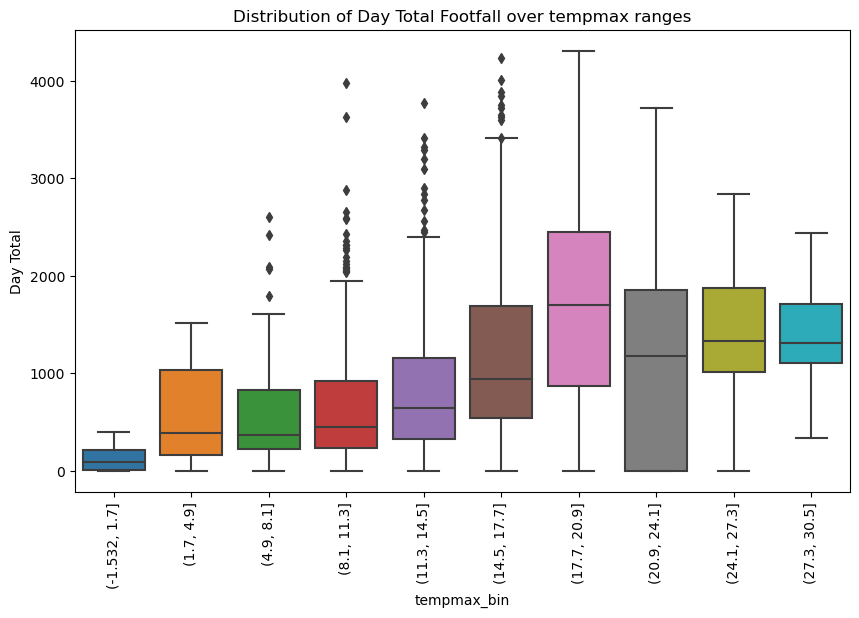

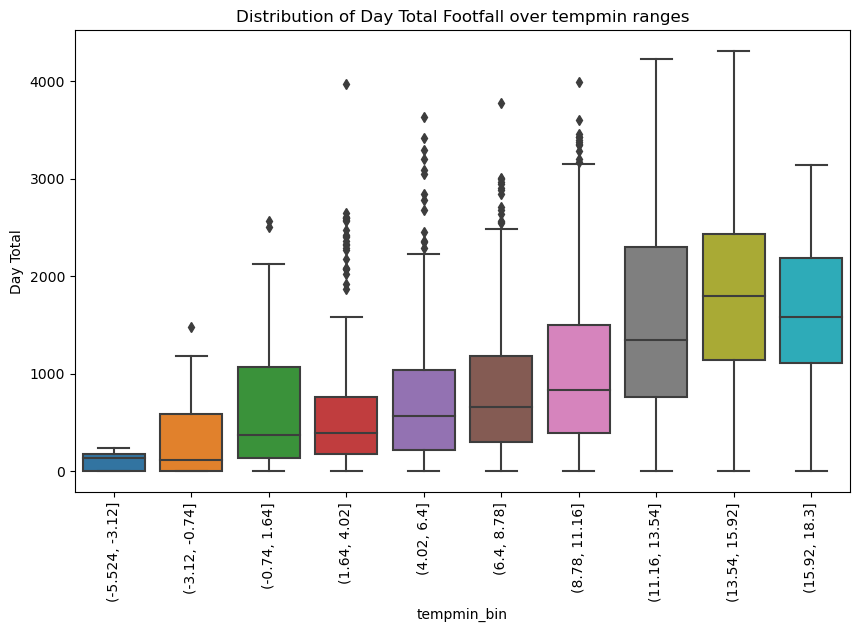

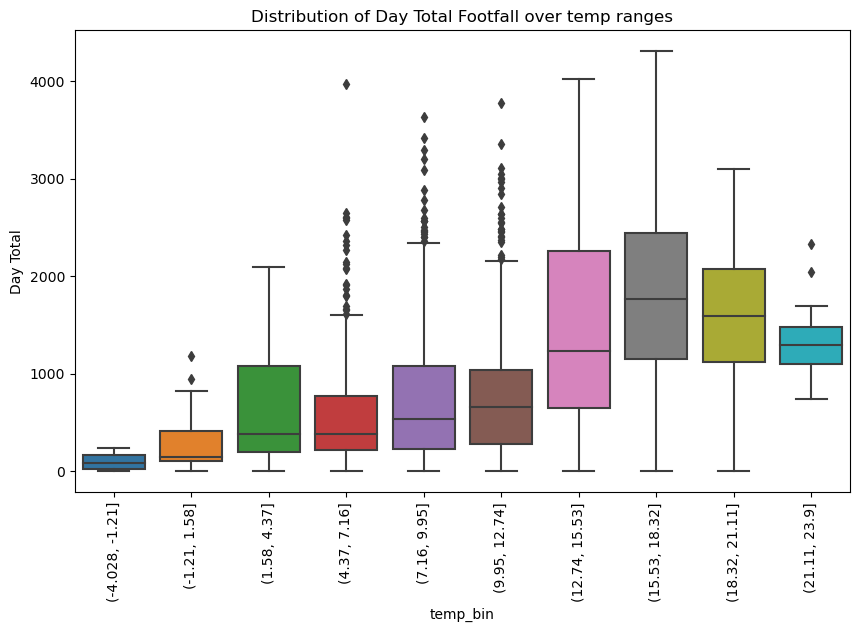

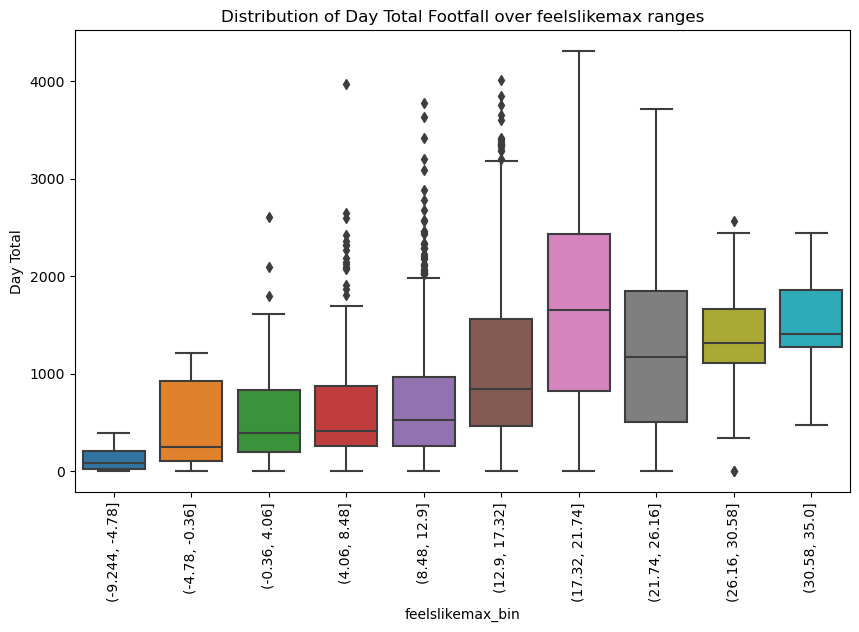

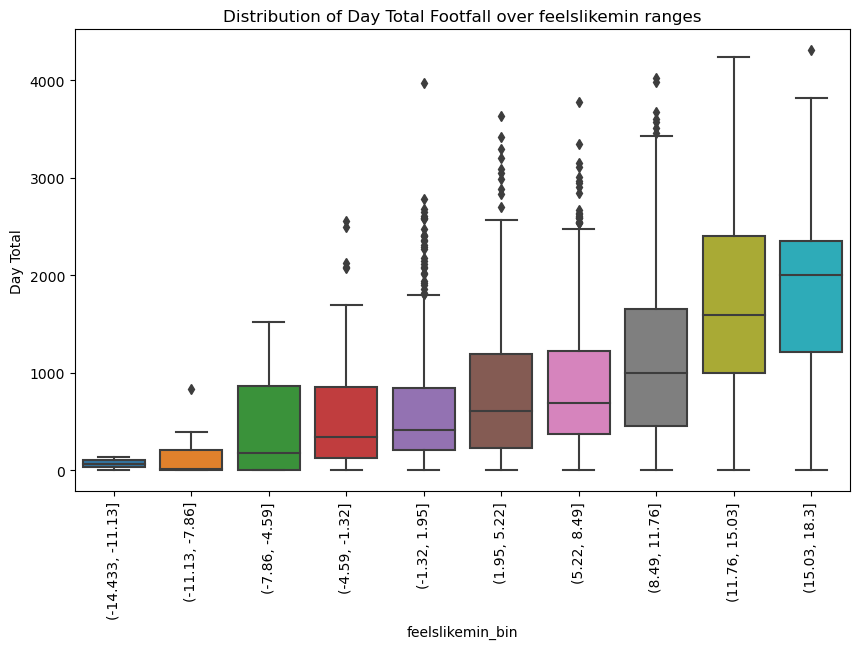

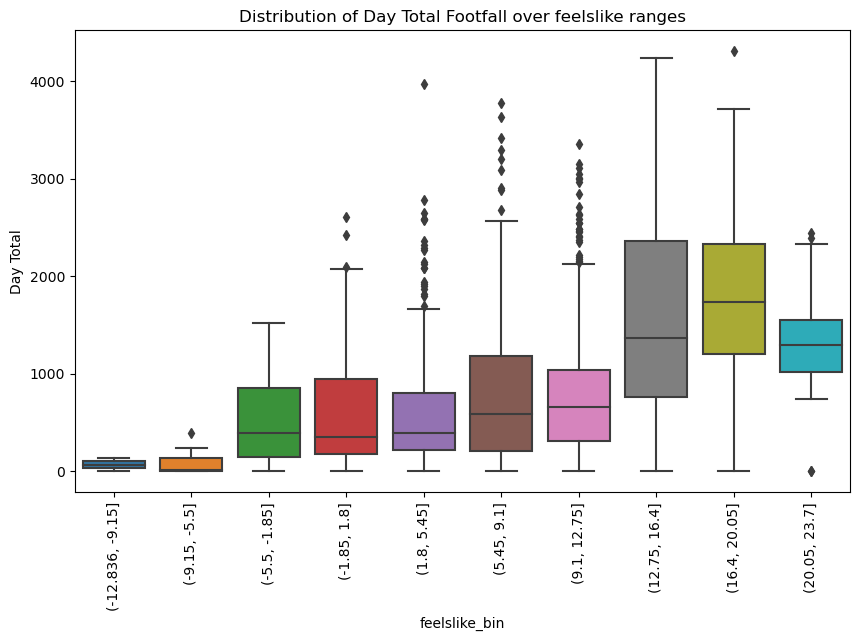

In [15]:

temp_columns = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike']

n_bins = 10

# For each temperature-related variable
for column in temp_columns:

    df[f'{column}_bin'] = pd.cut(df[column], bins=n_bins)

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=f'{column}_bin', y='Day Total', data=df)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of Day Total Footfall over {column} ranges')
    plt.show()
 

### The temperature bin with the highest median value is the one that typically attracts the highest footfall.

Tempmax:17.7 - 20.9
 Feelslikemax:17.32 - 21.74

Temp:15.53 - 18.32
 Feelslike:16.4 - 20.05

Tempmin:13.54 - 15.92
 Feelslikemin:15.03 - 18.3
